### Importing tensorflow libraries

In [ ]:
from tensorflow import keras
from keras.layers import Conv2D
from keras import layers

### Loading the dataset

In [ ]:
train, test = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train, y_train = train

In [ ]:
X_test, y_test = test

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
X_train[0].shape

(28, 28)

### Function to show some training images.

In [ ]:
import matplotlib.pyplot as plt
def show_data(data, target):
  length = len(data)
  if length % 2 != 0:
    length += 1
  
  fig, axis = plt.subplots(5, 5, figsize=(10,10))
  for x in range(5):
    for y in range(5):
      axis[x, y].imshow(data[x  + y], cmap="gray")
      axis[x, y].set_title(target[x + y])
  fig.tight_layout()
  plt.show()

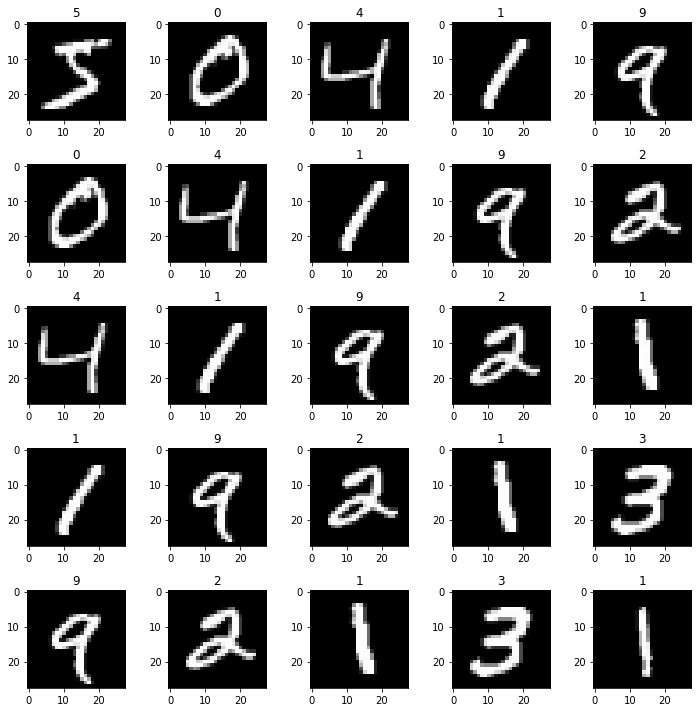

In [ ]:

show_data(X_train[:25], y_train[:25])

### Normalizing the data

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

### Changing the categories to one-hot vector.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(y_train.reshape(-1, 1))
onehotLabels = enc.transform(y_train.reshape(-1, 1)).toarray()
onehotLabels.shape

(60000, 10)

In [ ]:
onehotLabels[0], y_train[0]

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), 5)

## LENET-5 model

In [ ]:
model = keras.Sequential()
model.add(
    Conv2D(6, kernel_size=(5,5),padding="same", strides=1, activation="sigmoid", input_shape=(28, 28,1))
)
model.add(
    layers.AveragePooling2D(pool_size=(2,2), strides=2, padding="valid", )
)
model.add( 
    Conv2D(16, (5,5), activation="sigmoid")
)
model.add( 
    layers.AveragePooling2D(2, 2)
)
model.add(
    layers.Flatten()
)

model.add(
    layers.Dense(120, activation="sigmoid")
)
model.add (
    layers.Dense(84, activation="sigmoid")
)
model.add(
     layers.Dense(10)
)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [ ]:
model.compile(loss="mean_squared_error", metrics="accuracy")

In [ ]:
history = model.fit(X_train, onehotLabels, batch_size=512, validation_split=0.2, epochs=100)

Epoch 1/100
94/94 [==============================] - 25s 246ms/step - loss: 0.0966 - accuracy: 0.0999 - val_loss: 0.0925 - val_accuracy: 0.1914
Epoch 2/100
94/94 [==============================] - 24s 256ms/step - loss: 0.0915 - accuracy: 0.1232 - val_loss: 0.0906 - val_accuracy: 0.1749
Epoch 3/100
94/94 [==============================] - 23s 245ms/step - loss: 0.0834 - accuracy: 0.3047 - val_loss: 0.0739 - val_accuracy: 0.4947
Epoch 4/100
94/94 [==============================] - 23s 244ms/step - loss: 0.0680 - accuracy: 0.5916 - val_loss: 0.0614 - val_accuracy: 0.6775
Epoch 5/100
94/94 [==============================] - 23s 244ms/step - loss: 0.0594 - accuracy: 0.6947 - val_loss: 0.0523 - val_accuracy: 0.7276
Epoch 6/100
94/94 [==============================] - 23s 244ms/step - loss: 0.0534 - accuracy: 0.7472 - val_loss: 0.0474 - val_accuracy: 0.8258
Epoch 7/100
94/94 [==============================] - 23s 243ms/step - loss: 0.0481 - accuracy: 0.7846 - val_loss: 0.0433 - val_accuracy:

In [ ]:
onehotTest = enc.transform(y_test.reshape(-1, 1)).toarray()

results = model.evaluate(X_test, onehotTest, batch_size=128)

79/79 [==============================] - 0s 4ms/step - loss: 0.0029 - accuracy: 0.9881


In [ ]:
print('test loss, test acc:', results)

test loss, test acc: [0.0028765720780938864, 0.988099992275238]


In [ ]:
predict = model.predict(X_test[10].reshape(1, 28,28, 1))
predict.argmax(), y_test[10]

(0, 0)

## Function to show the prediction image along with the actual value 

In [ ]:
def show_predictions(image, y):
  predict = model.predict(image.reshape(1, 28, 28, 1))
  plt.figure(figsize=(3,3))
  plt.imshow(image, cmap="gray", interpolation="nearest")
  plt.title(f"Predicted: {predict.argmax()} Actual: {y}")
  plt.tight_layout()
  plt.show()


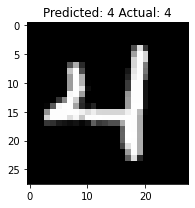

In [ ]:
show_predictions(X_test[103], y_test[103])

In [ ]:
import pickle 

with open("history.pkl", "wb") as pick:
  pickle.dump(history, pick)

INFO:tensorflow:Assets written to: ram://915533cb-eaaf-4ca9-95e6-ba81b4485d4b/assets


In [ ]:
model.save("number_model.h5")